In [12]:
pip install WordCloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install camel_tools

  Using cached tokenizers-0.19.1-cp312-none-win_amd64.whl.metadata (6.9 kB)
   ---------------------------------------- 0.0/9.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.4 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.4 MB 5.6 MB/s eta 0:00:02
   -- ------------------------------------- 0.5/9.4 MB 5.6 MB/s eta 0:00:02
   -- ------------------------------------- 0.5/9.4 MB 5.6 MB/s eta 0:00:02
   --- ------------------------------------ 0.8/9.4 MB 859.5 kB/s eta 0:00:11
   ---- ----------------------------------- 1.0/9.4 MB 1.1 MB/s eta 0:00:08
   ------ --------------------------------- 1.6/9.4 MB 1.2 MB/s eta 0:00:07
   ------- -------------------------------- 1.8/9.4 MB 1.3 MB/s eta 0:00:06
   ------- -------------------------------- 1.8/9.4 MB 1.3 MB/s eta 0:00:06
   ------- -------------------------------- 1.8/9.4 MB 1.3 MB/s eta 0:00:06
   ------- -------------------------------- 1.8/9.4 MB 1.3 MB/s eta 0:00:06
   ------- -------------


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
import os
import re
import string
import emoji

In [19]:
folder= 'text_files'
output_file= 'merged_text.txt'

with open(output_file, 'w', encoding='utf-8') as f:
    for filename in os.listdir(folder):
        file_path=os.path.join(folder,filename)
        if os.path.isfile(file_path) and filename.endswith('.txt'):
            with open(file_path,'r',encoding='utf-8') as infile:
                f.write(infile.read())
                f.write('\n')
        

In [20]:
#remove punctuation
def remove_punctuation(text):
    arabic_punctuations= '''`÷×↑<>_—()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ'GPCgpcEeOVovUuéXx'''
    english_punctuations=string.punctuation
    all_punctuations= arabic_punctuations+english_punctuations
    return re.sub(f"[{re.escape(all_punctuations)}]","",text)

In [21]:
#remove links mentions hashtags
def remove_links_mentions_hashtags(text):
    text=re.sub(r"http\S+|www\S+","",text)
    text=re.sub(r"@\w+|#\w+","",text)
    return text

In [22]:
#convert latin charachters into arabic
latin_to_arabic = {
    'a': 'ا', 'A': 'ا',
    'b': 'ب', 'B': 'ب',
    't': 'ت', 'T': 'ت',
    'j': 'ج', 'J': 'ج',
    '7': 'ح','d': 'د', 'D': 'د',
    'r': 'ر', 'R': 'ر',
    'z': 'ز', 'Z': 'ز',
    's': 'س', 'S': 'س',
    '3': 'ع','f': 'ف', 'F': 'ف',
    'q': 'ق', 'Q': 'ق',
    'k': 'ك', 'K': 'ك',
    'l': 'ل', 'L': 'ل',
    'm': 'م', 'M': 'م',
    'n': 'ن', 'N': 'ن',
    'h': 'ه', 'H': 'ه',
    'w': 'و', 'W': 'و',
    'y': 'ي', 'Y': 'ي',
    'i': 'ي',
}

def translate(text):
    for latin, arabic in latin_to_arabic.items():
        text=text.replace(latin,arabic)
    return text

In [23]:
def remove_numbers(text):
    return re.sub(r'\d+', '', text)

In [24]:
#remove harakat
def remove_harakat(text):
    arabic_harakat=re.compile(r'[\u0617-\u061A\u064B-\u0652]')
    return re.sub(arabic_harakat,'',text)

In [25]:
#remove emojis
def remove_emojis(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese characters
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)


In [26]:
import unicodedata

def remove_french_accents(text):
    # Normalize text to NFKD form, then remove diacritical marks
    nfkd_form = unicodedata.normalize('NFKD', text)
    return ''.join([c for c in nfkd_form if not unicodedata.combining(c)])


In [27]:
def normalize_arabic(text):
    text = re.sub("[إأآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ؤ", "ء", text)
    text = re.sub("ئ", "ء", text)
    text = re.sub("ة", "ه", text)
    text = re.sub("گ", "ك", text)
    text = re.sub("ڤ", "ف", text)
    text = re.sub("چ", "ج", text)
    text = re.sub("پ", "ب", text)
    text = re.sub("ڜ", "ش", text)
    text = re.sub("ڪ", "ك", text)
    text = re.sub("ڧ", "ق", text)
    text = re.sub("ٱ", "ا", text)
    return text

In [28]:
latin_to_arabic = {
    'a': 'ا', 'A': 'ا',
    'b': 'ب', 'B': 'ب',
    't': 'ت', 'T': 'ت',
    'j': 'ج', 'J': 'ج',
    '7': 'ح',
    'd': 'د', 'D': 'د',
    'r': 'ر', 'R': 'ر',
    'z': 'ز', 'Z': 'ز',
    's': 'س', 'S': 'س',
    '3': 'ع',
    'f': 'ف', 'F': 'ف',
    'q': 'ق', 'Q': 'ق',
    'k': 'ك', 'K': 'ك',
    'l': 'ل', 'L': 'ل',
    'm': 'م', 'M': 'م',
    'n': 'ن', 'N': 'ن',
    'h': 'ه', 'H': 'ه',
    'w': 'و', 'W': 'و',
    'y': 'ي', 'Y': 'ي',
    '2': 'ء',
    '5': 'خ',
    '6': 'ط',
    '8': 'ق',
    '9': 'ص'
}
def arabizi_to_arabic(text, mapping=latin_to_arabic):
    return ''.join([mapping.get(char, char) for char in text])

###### 

In [29]:
def preprocess_text(text):
    text=remove_punctuation(text)
    text=remove_links_mentions_hashtags(text)
    text=arabizi_to_arabic(text)
    #text=translate(text)
    text=remove_harakat(text)
    text=remove_numbers(text)
    text=remove_emojis(text)
    text=normalize_arabic(text)
    text=remove_french_accents(text)
    return text.strip()

output_file= 'merged_text.txt'
with open(output_file,'r',encoding='utf-8')as f:
    text=f.read()

clean_text=preprocess_text(text)

In [30]:
print(text[10000:11000])
print('\n')
print(clean_text[10000:11000])


 يوم جمعة من الشهر

14 يناير أو 14 كانون الثاني أو يوم 14\1
تقدر تزيد شوف بزاف د صور و معلومات ديال 14 January ف ويكيميديا كومنز.15 أكتوبر ولا 15 كتوبر ولا نهار 15 شهر 10
حوايج وقعو[بدل | بدل لكود]
1940: النظام د فرانكو كايعدم جويس كومپانس، الرئيس د الجينيرالطاط د كاطالونيا.
ناس توفاو[بدل | بدل لكود]
2020 : لمحجوبي أحرضان، سياسي مغريبي.
تقدر تزيد شوف بزاف د صور و معلومات ديال 15 October ف ويكيميديا كومنز.15 شتنبر ولا 15 سبتمبر ولا 15 أيلول ولا نهار 15 شهر 9
حوايج وقعو[بدل | بدل لكود]
1681 : سلطان د لمغريب مولاي سماعيل صافط برية لماليك د فرانصا لوي ربعطاش باش يدخل لإسلام.
1830 : أول خط ديال تران تحل بين ليڤرپول و مانشيسطر ف لينڭليز.
1952 : لأمم لمتحدة عطات إيريطيريا ل إتيوپيا.
1991 : لحبس د تازمامارت تسد، 28 حبّاسة خرجو حيين من أصل 58 واحد تشد.
ناس توفاو[بدل | بدل لكود]
2020 : أنور لجندي، ممتّيل مغريبي.
تقدر تزيد شوف بزاف د صور و معلومات ديال 15 September ف ويكيميديا كومنز.قالب:تقويم 2/أول يوم تنين من الشهر

15 غشت
تقدر تزيد شوف بزاف د صور و معلومات ديال 15 August ف ويكيميديا كومنز.قالب

In [31]:
file_path='cleaned_text.txt'
with open(file_path,'w',encoding='utf-8') as f:
    f.write(clean_text)

In [1]:
#access cleaned text for EDA
with open('cleaned_text.txt','r',encoding='utf-8') as f:
    text=f.read()

In [33]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

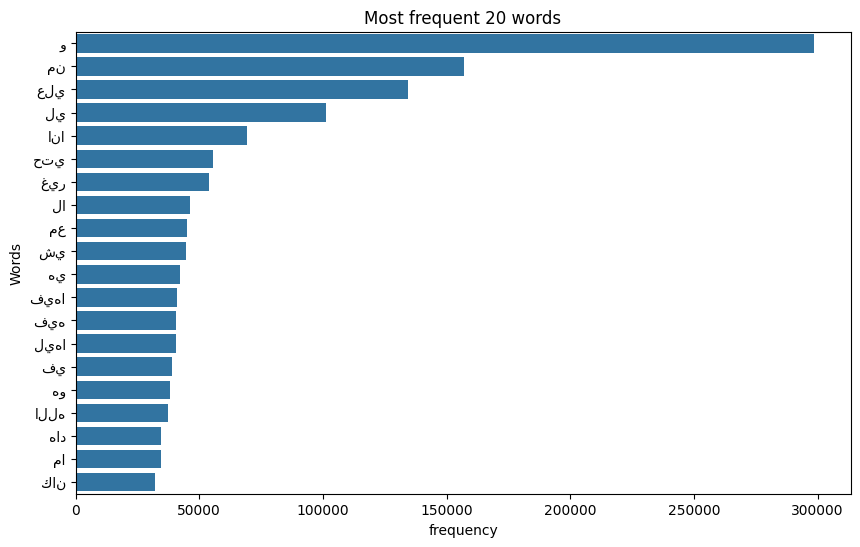

In [34]:
cleaned_word=text.split()
word_frequency=Counter(cleaned_word).most_common(20)
words, freqs=zip(*word_frequency)
plt.figure(figsize=(10,6))
sns.barplot(x=list(freqs), y=list(words))
plt.title("Most frequent 20 words")
plt.xlabel("frequency")
plt.ylabel("Words")

plt.show()

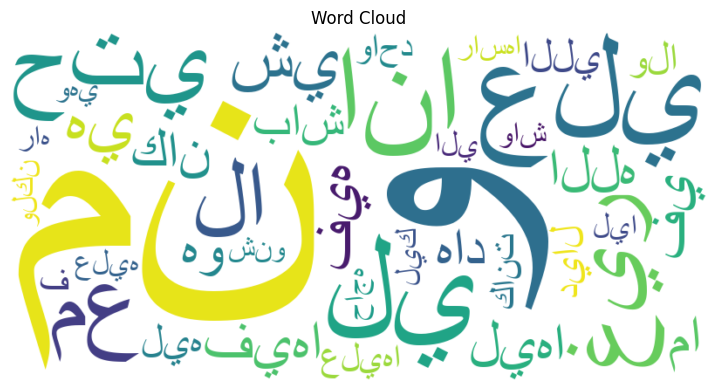

In [35]:
from wordcloud import WordCloud

word_frequency=Counter(cleaned_word).most_common(40)
words, freqs=zip(*word_frequency)
wordcloud = WordCloud(font_path='arial',  # use Arabic-supporting font
                      background_color='white',
                      width=800,
                      height=400).generate(' '.join(words))

plt.figure(figsize=(9, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud")
plt.show()


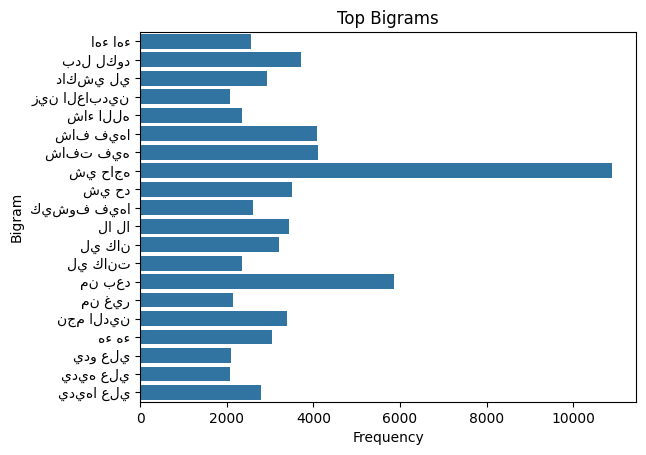

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(2, 2), max_features=20)
X = vectorizer.fit_transform([text])
bigrams = vectorizer.get_feature_names_out()
counts = X.toarray().sum(axis=0)

sns.barplot(x=counts, y=bigrams)
plt.title("Top Bigrams")
plt.xlabel("Frequency")
plt.ylabel("Bigram")
plt.show()


In [2]:
#tokenize data 
from nltk.tokenize import sent_tokenize, word_tokenize
import nltk
nltk.download('punkt')

sentences=sent_tokenize(text)
tokenized_sentences=[sentence.split() for sentence in sentences]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kaout\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
#tokenize data with camel tool for arabic
from camel_tools.tokenizers.word import simple_word_tokenize
tokenized_sentences=simple_word_tokenize(text)

In [37]:
#pretrained darija model
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("CAMeL-Lab/bert-base-arabic-camelbert-da-sentiment")
tokenized_sentences = tokenizer.tokenize(text)

tokenizer_config.json:   0%|          | 0.00/86.0 [00:00<?, ?B/s]

C:\Users\kaout\AppData\Local\Programs\Python\Python312\Lib\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\kaout\.cache\huggingface\hub\models--CAMeL-Lab--bert-base-arabic-camelbert-da-sentiment. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config.json:   0%|          | 0.00/841 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/305k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [23]:
from gensim.models import Word2Vec
#epochs=10 skipgram3.model
#epochs=20 skipgram4.model
#the less epochs the better
def train_skipgram_word2vec(text, vector_size=100, window=5, min_count=5, epochs=20, model_path="skipgram4.model"):    

    # Train Word2Vec Skip-gram + negative sampling
    model = Word2Vec(
        sentences=text,
        vector_size=vector_size,
        window=window,
        min_count=min_count,
        sg=1,               # sg=1 means skip-gram (0 = CBOW)
        negative=10,        # Negative sampling
        workers=4,
        epochs=epochs
    )
    
    model.save(model_path)
    return model

In [4]:
model1=train_skipgram_word2vec(tokenized_sentences)

In [5]:
vector = model1.wv['السكان']
print(vector)

[ 0.05156886  0.48717472 -0.07691228  0.13884065 -0.1664448  -0.5138543
  0.16133265  0.5210541   0.27660528 -0.08068062  0.00559274 -0.15228945
  0.3228126  -0.21344958 -0.09057133  0.33112416  0.09665103  0.08805127
 -0.13112198  0.06790507  0.27752623 -0.12353393  0.11774085 -0.1094694
 -0.7413172   0.17922285 -0.7023249   0.49029973 -0.20104721 -0.18165149
  0.07641181 -0.10003551  0.26051262 -0.8228614   0.12476905 -0.49635306
  0.35092214  0.13056752 -0.18562342  0.13716806 -0.12937555  0.02452611
 -0.23619412 -0.03801662 -0.26359493 -0.38263664 -0.2851908  -0.41303635
  0.6507063  -0.17806244  0.4240886  -0.12749322  0.6535334  -0.2320256
  0.33342502  0.20304182  0.72561353  0.21336713 -0.22175722  0.26005226
 -0.17699829 -0.29019424  0.02437731 -0.13766585  0.0044368   0.45479754
 -0.03057545 -0.21113877 -0.1355661   0.18841173  0.0198493   0.08774726
  0.1397484  -0.09904566 -0.26056883  0.15973727  0.7237617   0.1126193
 -0.5279036  -0.4302415  -0.18740802 -0.1395261   0.283

In [44]:
vector = model1.wv['و']
print(vector)

[-0.00930901 -0.15196852  0.2512805   0.08475202  0.1549405   0.0017858
 -0.03126273  0.22390027 -0.23582588 -0.18911627 -0.06441711  0.01364898
 -0.19124816 -0.03960736  0.2728562  -0.04213876 -0.0463893   0.11625908
 -0.08096094 -0.19497573  0.1919654  -0.05407914  0.2556914  -0.21569778
 -0.01011389 -0.07226141  0.0846918   0.19393133  0.06320345 -0.12345968
  0.05431229 -0.18850584 -0.02086386 -0.19940011  0.0380531   0.00412377
  0.36662182  0.05873898 -0.03115839  0.0610877   0.15135017 -0.07936253
 -0.20184043  0.09085567 -0.03115521 -0.01162297 -0.02804038  0.1414982
  0.1063445   0.10069154  0.03785754 -0.15520123 -0.09954     0.08221471
 -0.31078917  0.10403027 -0.17228791 -0.01800923 -0.05716681 -0.07596974
  0.0290518   0.1448819   0.16526489  0.05995962  0.03960673  0.29817992
  0.15859936  0.18440841 -0.30021033  0.00185744  0.03180932  0.21998116
  0.1016439   0.05993569 -0.00533707 -0.18101665 -0.01569309  0.20276731
  0.06760082  0.01167079 -0.31892875  0.04916187 -0.0

In [19]:
model1.wv.most_similar('ناس', topn=5)

[('نسبه', 0.8980107307434082),
 ('عخ', 0.8926795721054077),
 ('يقدرو', 0.8877142071723938),
 ('لبطاله', 0.8834342360496521),
 ('لاميه', 0.8797078728675842)]

In [20]:
model1.wv.most_similar('خدمه', topn=5)

[('تايقلبو', 0.9789259433746338),
 ('خدامينش', 0.975524365901947),
 ('لبطاله', 0.9604998826980591),
 ('يخدمو', 0.9503622651100159),
 ('عخ', 0.9495071768760681)]

In [21]:
model1.wv.most_similar('سكان', topn=5)

[('قاريين', 0.9798139929771423),
 ('قط', 0.96837317943573),
 ('يكتبو', 0.9554113745689392),
 ('طح', 0.9488940238952637),
 ('طق', 0.9394755363464355)]

In [22]:
model1.wv.most_similar('تانوي', topn=5)

[('قاريين', 0.9825026392936707),
 ('جامعه', 0.9816305041313171),
 ('اقتصادبدل', 0.9789241552352905),
 ('قء', 0.9563937187194824),
 ('طق', 0.944690465927124)]

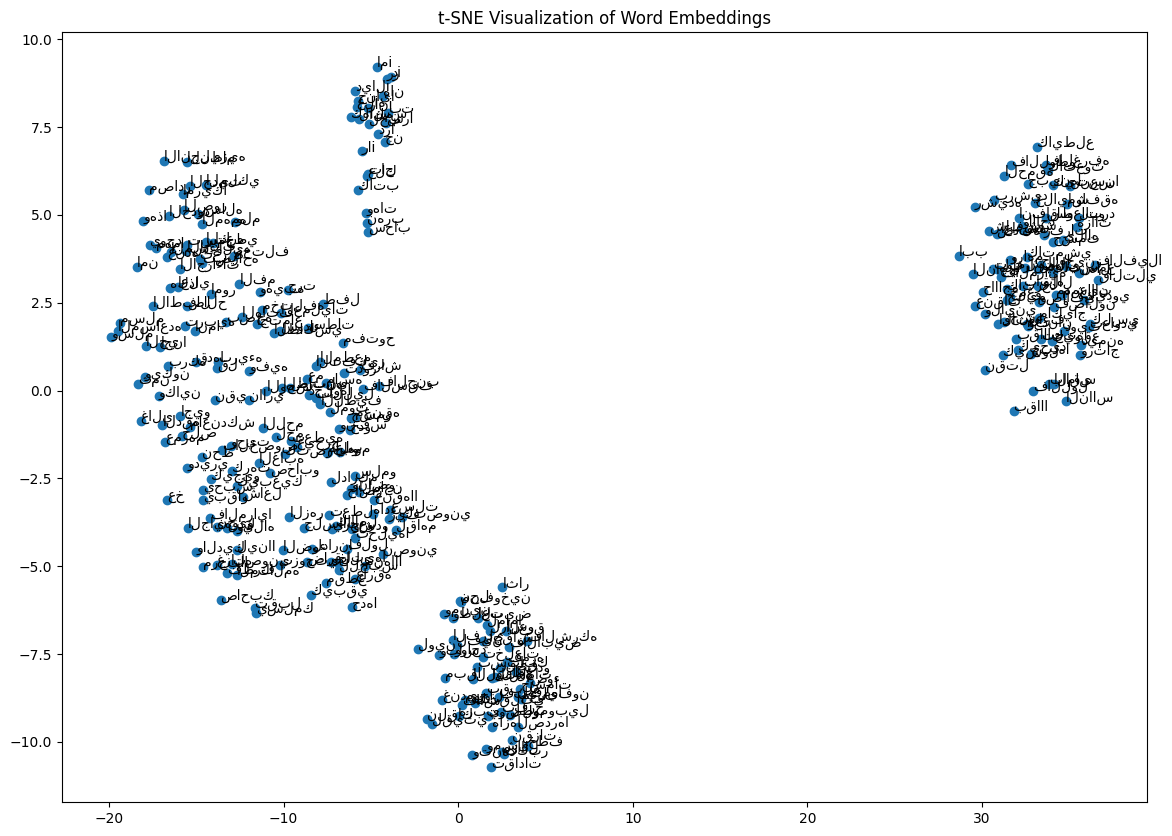

In [18]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

words = list(model3.wv.index_to_key)[5000:5300]  #300 words
vectors = [model3.wv[word] for word in words]

tsne = TSNE(n_components=2, random_state=0, perplexity=30)
Y = tsne.fit_transform(np.array(vectors))

plt.figure(figsize=(14,10))
plt.scatter(Y[:,0], Y[:,1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(Y[i,0], Y[i,1]))
plt.title("t-SNE Visualization of Word Embeddings")
plt.show()


In [24]:
#testing differnt number of epochs
model2=train_skipgram_word2vec(tokenized_sentences)

In [26]:
model2.wv.most_similar('ناس', topn=5)

[('لبطاله', 0.7717539668083191),
 ('نسبه', 0.7656196355819702),
 ('باراسولات', 0.7617628574371338),
 ('تايقلبو', 0.7606444358825684),
 ('خدامينش', 0.7597977519035339)]

In [27]:
model2.wv.most_similar('خدمه', topn=5)

[('تايقلبو', 0.9198859333992004),
 ('خدامينش', 0.911451518535614),
 ('ءعط', 0.8867831826210022),
 ('لبطاله', 0.8715103268623352),
 ('عخ', 0.8704018592834473)]

In [28]:
model2.wv.most_similar('سكان', topn=5)

[('طخ', 0.9142640233039856),
 ('قاريين', 0.901141345500946),
 ('طح', 0.8984509110450745),
 ('خح', 0.8938338756561279),
 ('خخ', 0.8894929885864258)]

In [29]:
model2.wv.most_similar('تانوي', topn=5)

[('اقتصادبدل', 0.9868381023406982),
 ('قاريين', 0.9729633331298828),
 ('ءخق', 0.9691768884658813),
 ('قء', 0.9575592279434204),
 ('طع', 0.9540417790412903)]

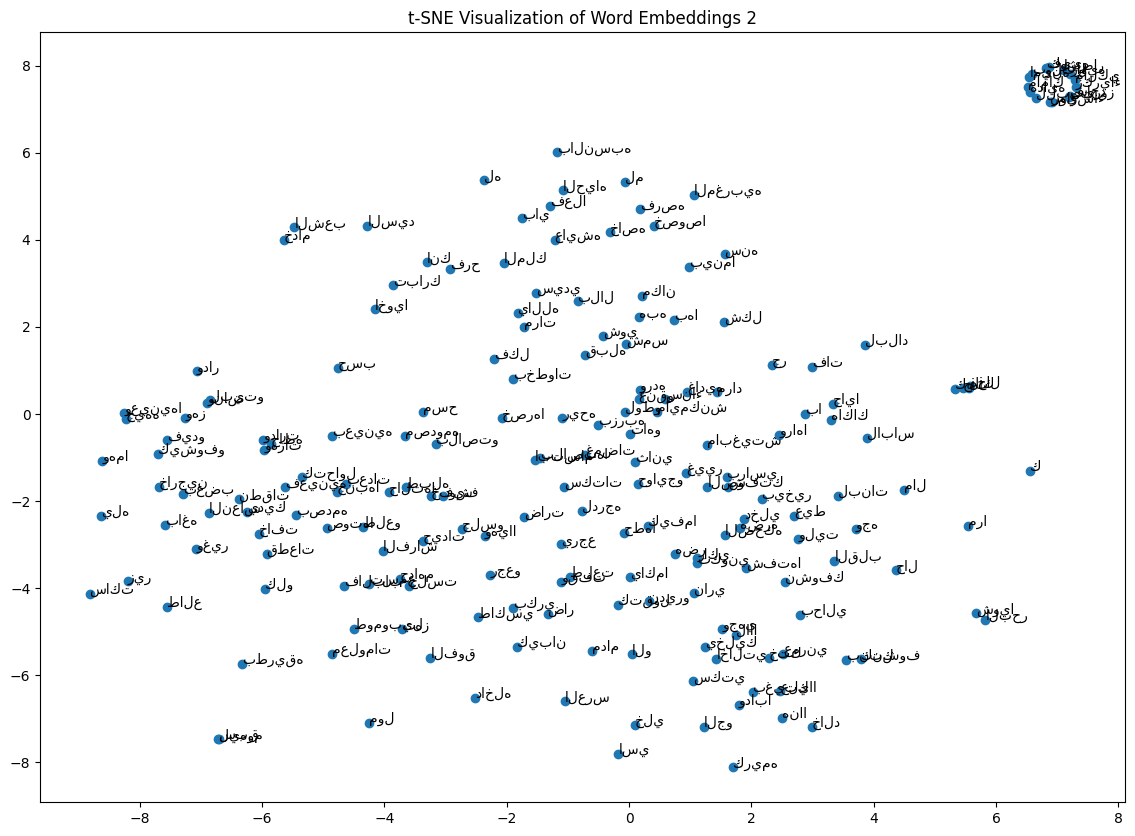

In [33]:

words = list(model2.wv.index_to_key)[1000:1200]  
vectors = [model2.wv[word] for word in words]

tsne = TSNE(n_components=2, random_state=0, perplexity=30)
Y = tsne.fit_transform(np.array(vectors))

plt.figure(figsize=(14,10))
plt.scatter(Y[:,0], Y[:,1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(Y[i,0], Y[i,1]))
plt.title("t-SNE Visualization of Word Embeddings 2")
plt.show()
